In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_598/124703152.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os
os.getcwd()

'/Users/Dell/Desktop/HEC/Invit-ai-ton_by_Eleven'

# **The Invitations : Selecting the best clients to invite for a marketing action**

**1. Exploratory Data Analysis**

In [3]:
action_data = pd.read_csv("data/actions.csv")
client_data = pd.read_csv("data/clients.csv")
transaction_data = pd.read_csv("data/transactions.csv")

In [4]:
# Merge action_data with transaction_data on 'client_id'
merged_temp = pd.merge(action_data, transaction_data, on='client_id', how='inner')
# Merge the result with client_data on 'client_id'
merge_data = pd.merge(merged_temp, client_data, on='client_id', how='inner')
merge_data.shape

(72301, 32)

In [5]:
action_data.columns

Index(['action_id', 'action_type_label', 'action_subcategory_label',
       'action_start_date', 'action_year', 'action_end_date',
       'action_collection_year', 'action_collection', 'action_universe',
       'action_category_label', 'action_channel', 'action_label', 'client_id',
       'client_is_present', 'client_is_invited'],
      dtype='object')

In [6]:
transaction_data.columns

Index(['client_id', 'transaction_id', 'transaction_date', 'product_quantity',
       'gross_amount_euro', 'product_category', 'product_subcategory',
       'product_style'],
      dtype='object')

In [7]:
client_data.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_segment', 'client_premium_status',
       'client_is_phone_contactable', 'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable'],
      dtype='object')

In [8]:
# Merge action_data with transaction_data on 'client_id'
merged_temp = pd.merge(action_data, transaction_data, on='client_id', how='inner')

# Merge the result with client_data on 'client_id'
merged_data = pd.merge(merged_temp, client_data, on='client_id', how='inner')

In [9]:
merge_data.columns

Index(['action_id', 'action_type_label', 'action_subcategory_label',
       'action_start_date', 'action_year', 'action_end_date',
       'action_collection_year', 'action_collection', 'action_universe',
       'action_category_label', 'action_channel', 'action_label', 'client_id',
       'client_is_present', 'client_is_invited', 'transaction_id',
       'transaction_date', 'product_quantity', 'gross_amount_euro',
       'product_category', 'product_subcategory', 'product_style',
       'client_country', 'client_gender', 'client_nationality', 'client_city',
       'client_segment', 'client_premium_status',
       'client_is_phone_contactable', 'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable'],
      dtype='object')

In [10]:
merged_data.isna().sum()

action_id                                      0
action_type_label                              0
action_subcategory_label                       0
action_start_date                              0
action_year                                    0
action_end_date                                0
action_collection_year                         0
action_collection                             15
action_universe                                0
action_category_label                          0
action_channel                             10644
action_label                                   0
client_id                                      0
client_is_present                              0
client_is_invited                              0
transaction_id                                 0
transaction_date                               0
product_quantity                               0
gross_amount_euro                              0
product_category                               0
product_subcategory 

In [11]:
merged_data["transaction_date"] = pd.to_datetime(merged_data["transaction_date"])
merged_data["action_start_date"] = pd.to_datetime(merged_data["action_start_date"])
merged_data["action_end_date"] = pd.to_datetime(merged_data["action_end_date"])
merged_data["action_duration"] = merged_data["action_end_date"] - merged_data["action_start_date"]

1.1. Visualizing Client Profile and Behavior

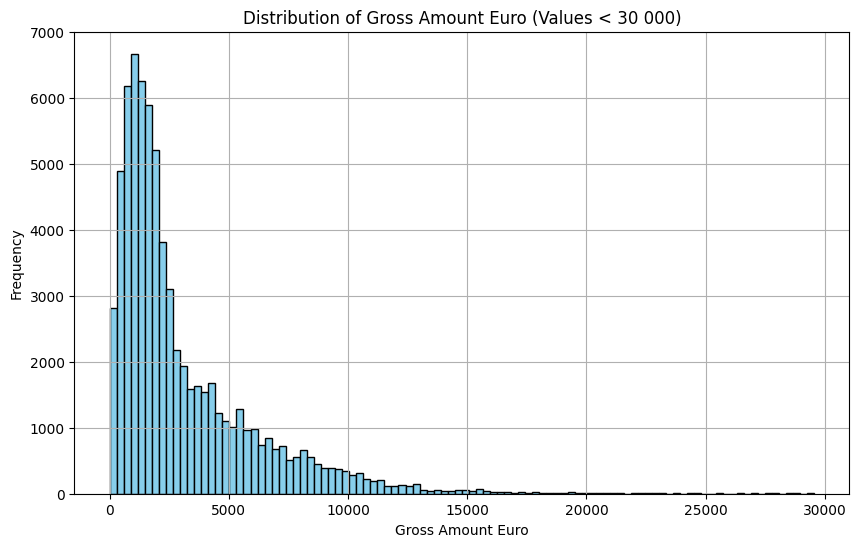

In [12]:
# Visualize Distribution of Purchase Prices less than 30K
plt.figure(figsize=(10, 6))
plt.hist(merged_data[merged_data['gross_amount_euro']<30000]["gross_amount_euro"], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Gross Amount Euro (Values < 30 000)')
plt.xlabel('Gross Amount Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

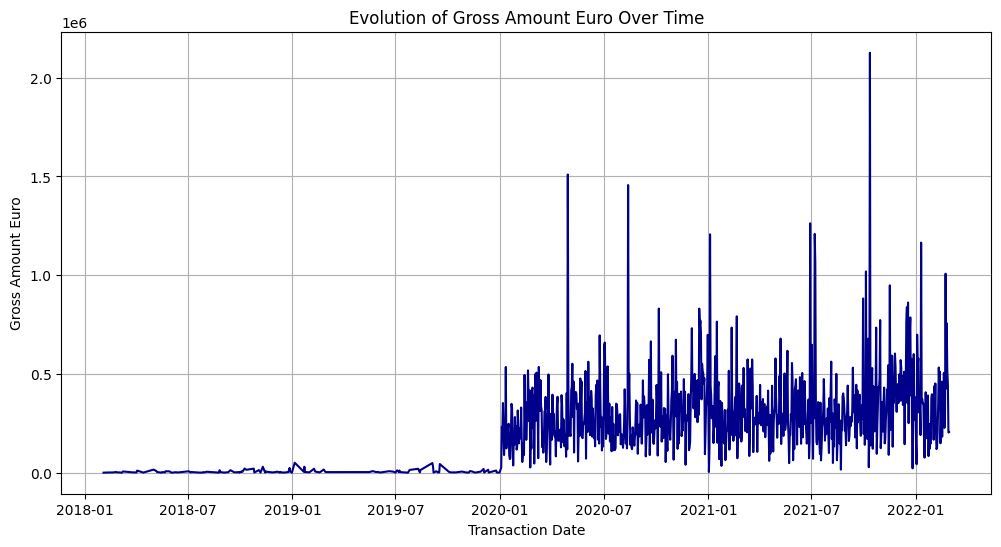

In [13]:
merged_data = merged_data.sort_values(by='transaction_date')

# Plotting the evolution of 'gross_amount_euro' over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['transaction_date'].dropna().unique(), merged_data.groupby('transaction_date')['gross_amount_euro'].sum(), linestyle='-', color='darkblue')
plt.title('Evolution of Gross Amount Euro Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Gross Amount Euro')
plt.grid(True)
plt.show()

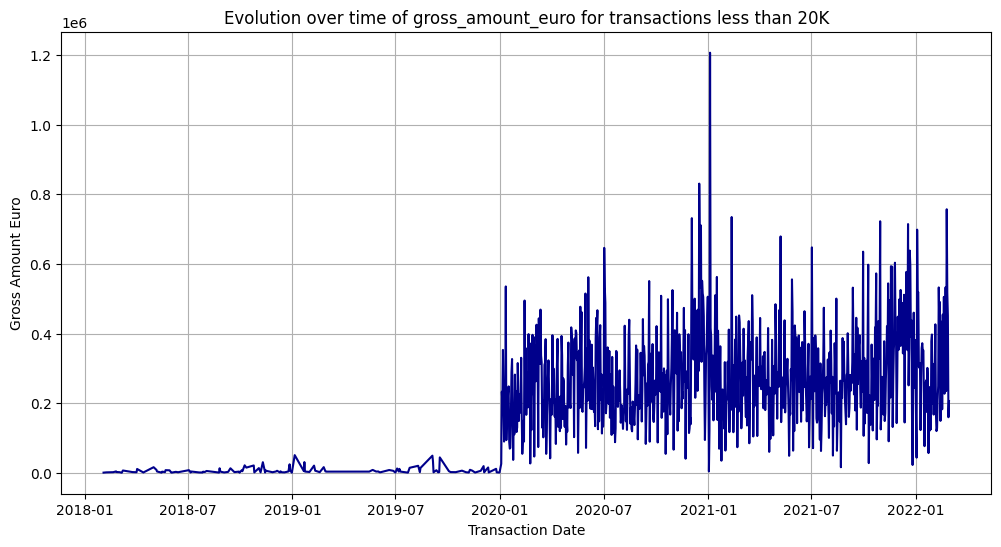

In [14]:
merged_data = merged_data.sort_values(by='transaction_date')

# Plotting the evolution over time of 'gross_amount_euro' for transactions less than 20K
plt.figure(figsize=(12, 6))
plt.plot(merged_data[merged_data['gross_amount_euro']<20000]['transaction_date'].unique(), merged_data[merged_data['gross_amount_euro']<20000].groupby('transaction_date')['gross_amount_euro'].sum(), linestyle='-', color='darkblue')
plt.title('Evolution over time of gross_amount_euro for transactions less than 20K')
plt.xlabel('Transaction Date')
plt.ylabel('Gross Amount Euro')
plt.grid(True)
plt.show()

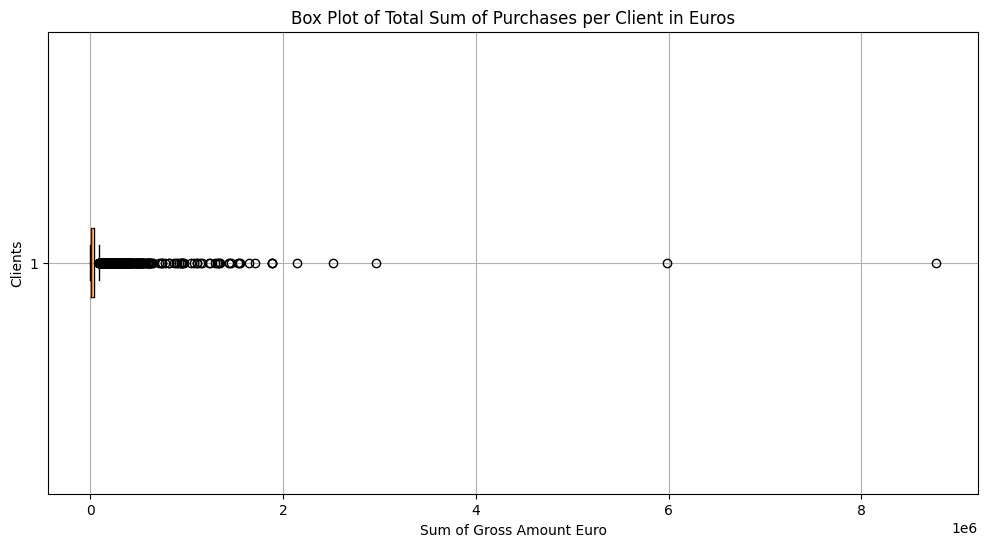

In [15]:
total_amount_euro_per_client = merged_data.groupby("client_id")["gross_amount_euro"].sum()

# Plot total amounts spent by clients
plt.figure(figsize=(12, 6))
plt.boxplot(total_amount_euro_per_client, vert=False)
plt.title('Box Plot of Total Sum of Purchases per Client in Euros')
plt.xlabel('Sum of Gross Amount Euro')
plt.ylabel('Clients')
plt.grid(True)
plt.show()

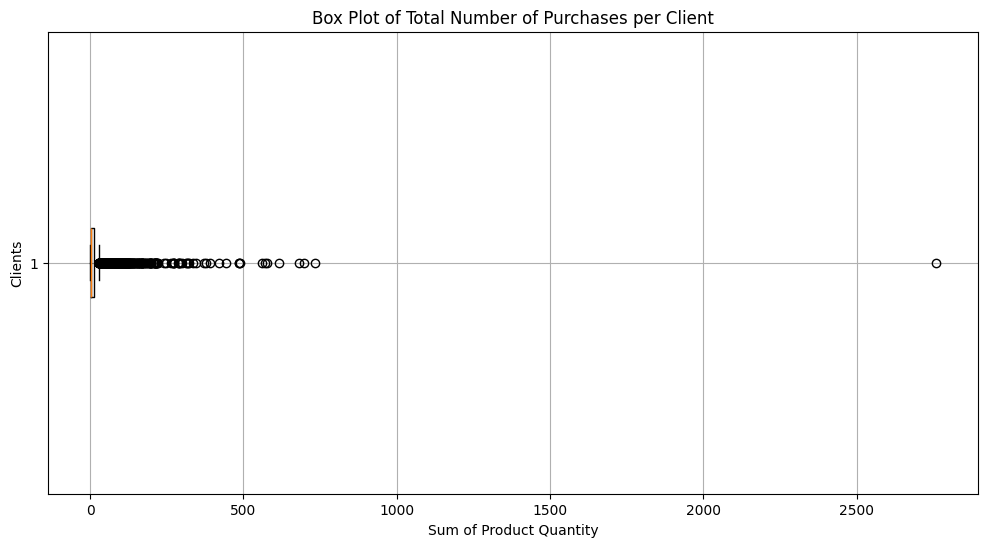

In [16]:
total_quantity_per_client = merged_data.groupby("client_id")["product_quantity"].sum()

# Plot total amounts spent by clients
plt.figure(figsize=(12, 6))
plt.boxplot(total_quantity_per_client, vert=False)
plt.title('Box Plot of Total Number of Purchases per Client')
plt.xlabel('Sum of Product Quantity')
plt.ylabel('Clients')
plt.grid(True)
plt.show()

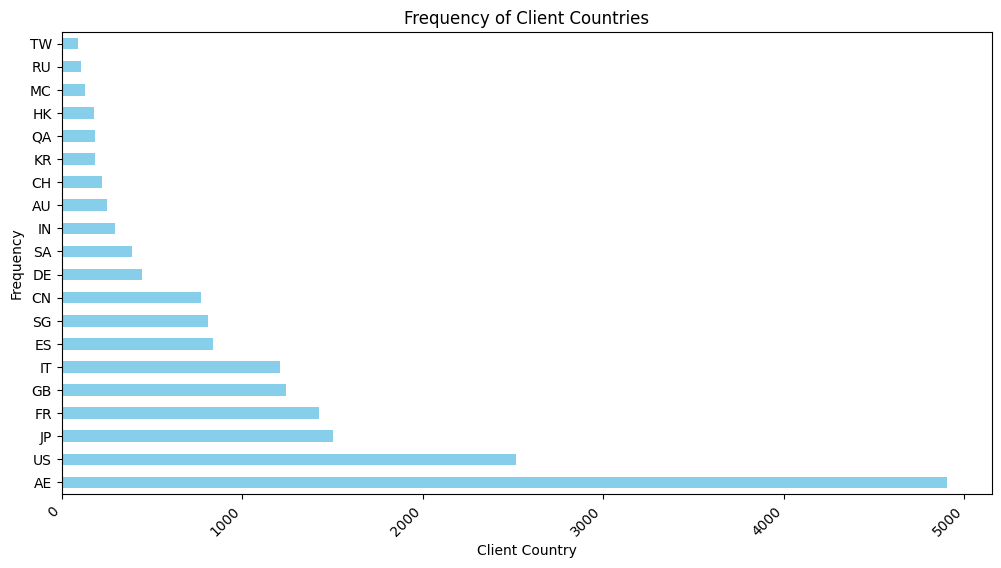

In [17]:
# Visualize most frequent client countries
country_counts = client_data['client_country'].value_counts().head(20)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Countries')
plt.xlabel('Client Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

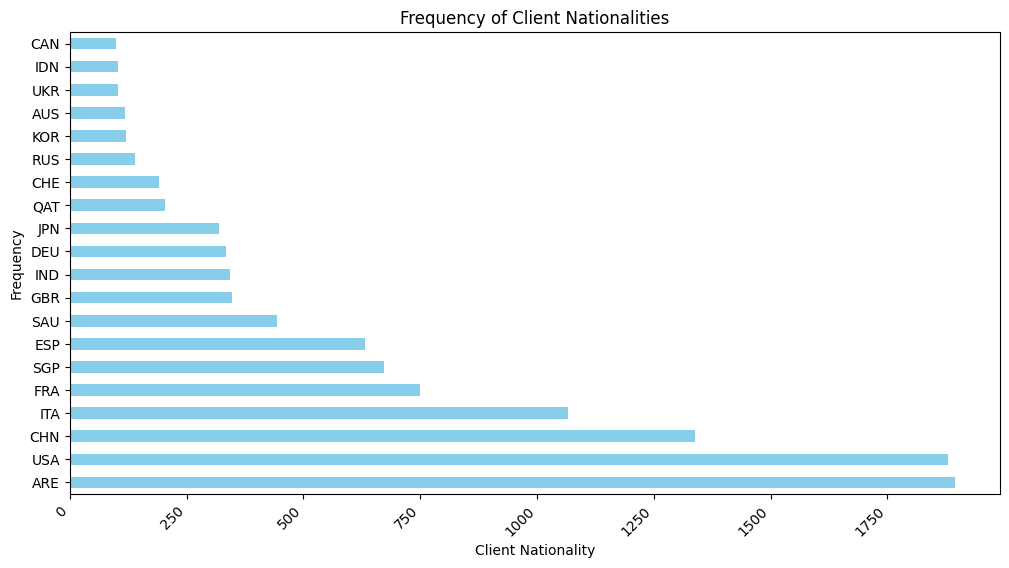

In [18]:
# Visualize most frequent client nationalities
nationality_counts = client_data['client_nationality'].value_counts().head(20)

plt.figure(figsize=(12, 6))
nationality_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Nationalities')
plt.xlabel('Client Nationality')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

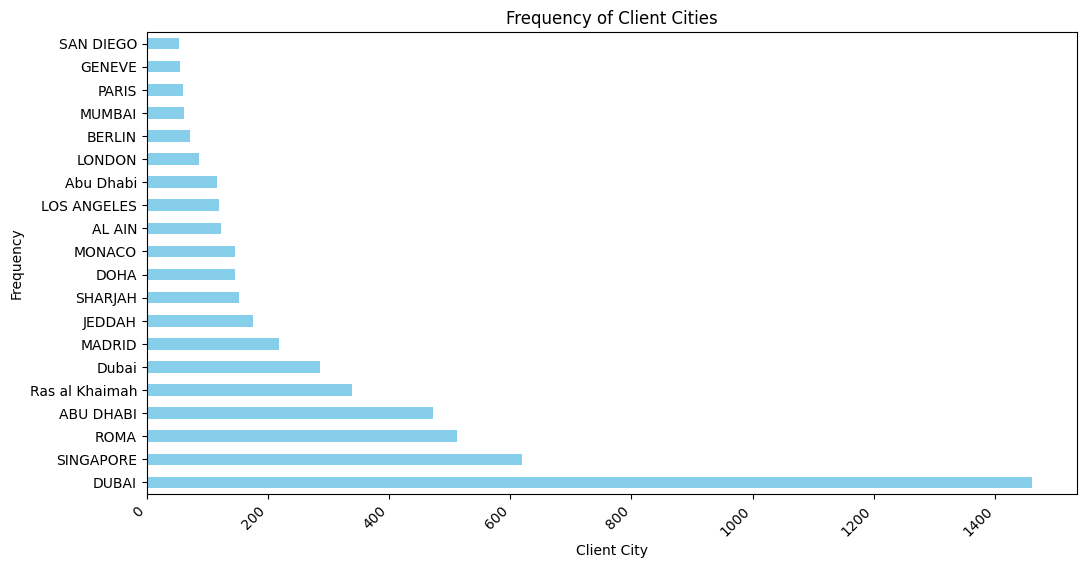

In [19]:
# Visualize most frequent client cities
city_counts = client_data['client_city'].value_counts().head(20)

plt.figure(figsize=(12, 6))
city_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Cities')
plt.xlabel('Client City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

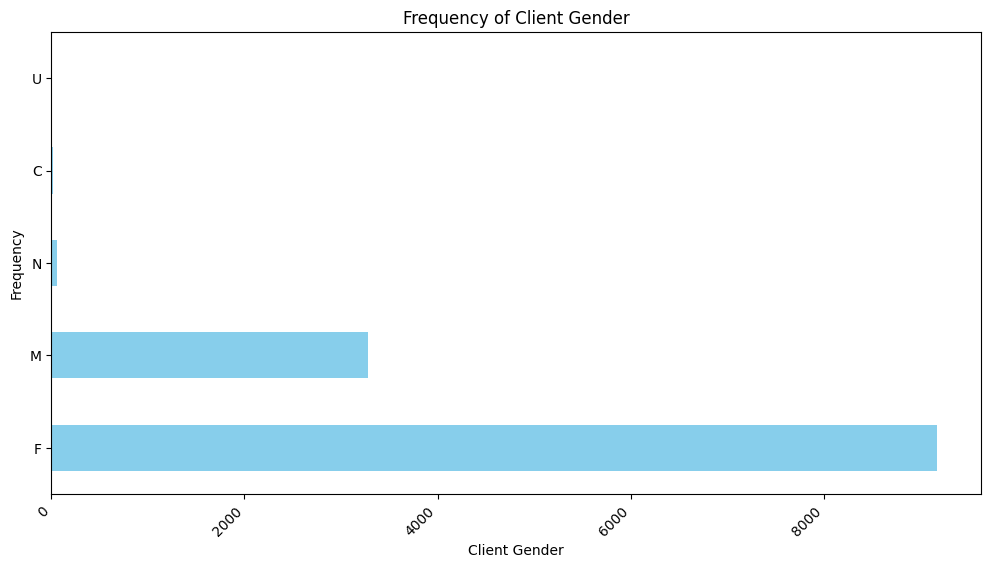

In [20]:
# Visualize most frequent client gender
gender_counts = client_data['client_gender'].value_counts().head(20)

plt.figure(figsize=(12, 6))
gender_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Gender')
plt.xlabel('Client Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

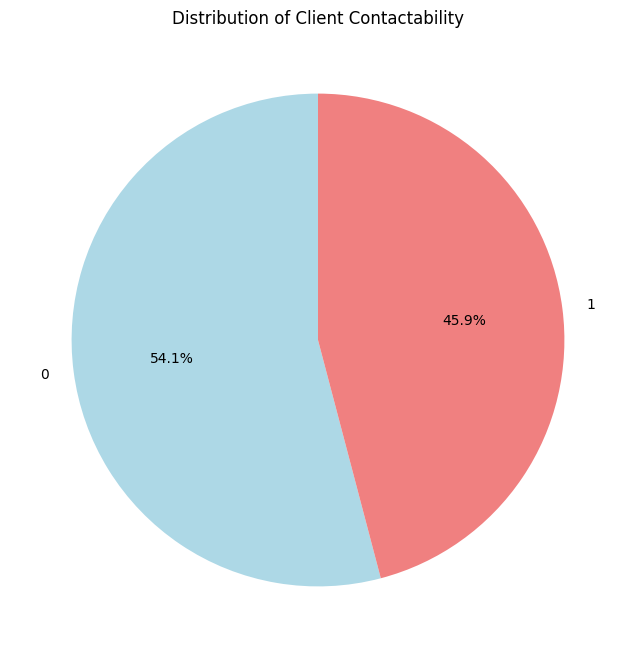

In [21]:
client_data['client_is_contactable'] = client_data['client_is_contactable'].astype('int')

# Visualizing proportion of contactable clients
contactable_counts = client_data['client_is_contactable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contactable_counts, labels=contactable_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Client Contactability')
plt.show()

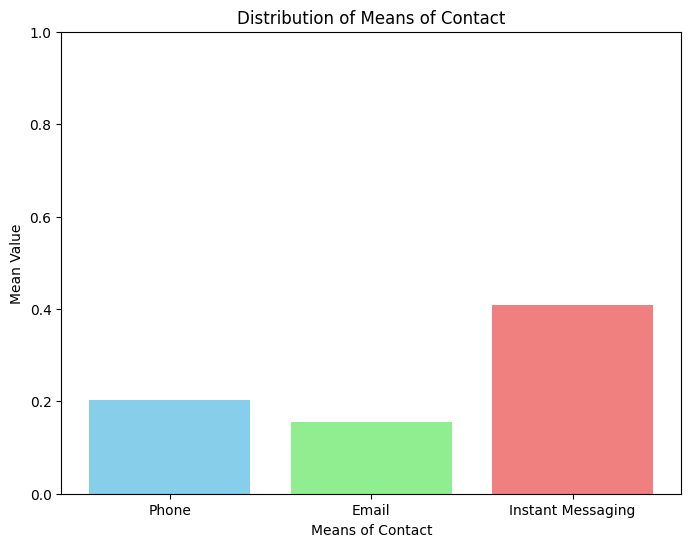

In [22]:
# Extract the mean values for each contact method
mean_phone_contactable = client_data['client_is_phone_contactable'].mean()
mean_email_contactable = client_data['client_is_email_contactable'].mean()
mean_instant_messaging_contactable = client_data['client_is_instant_messaging_contactable'].mean()

# Plotting a bar graph
contact_methods = ['Phone', 'Email', 'Instant Messaging']
means_of_contact = [mean_phone_contactable, mean_email_contactable, mean_instant_messaging_contactable]

plt.figure(figsize=(8, 6))
plt.bar(contact_methods, means_of_contact, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Means of Contact')
plt.xlabel('Means of Contact')
plt.ylabel('Mean Value')
plt.ylim(0, 1)
plt.show()

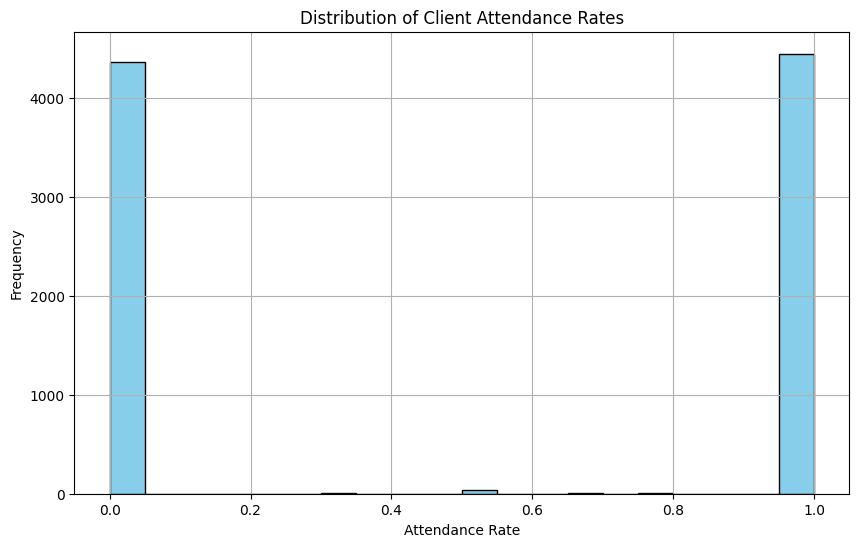

In [23]:
# Calculate the attendance rate for each client
action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()

# Visualize the distribution of attendance rates
plt.figure(figsize=(10, 6))
plt.hist(action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()
, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Attendance Rates')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

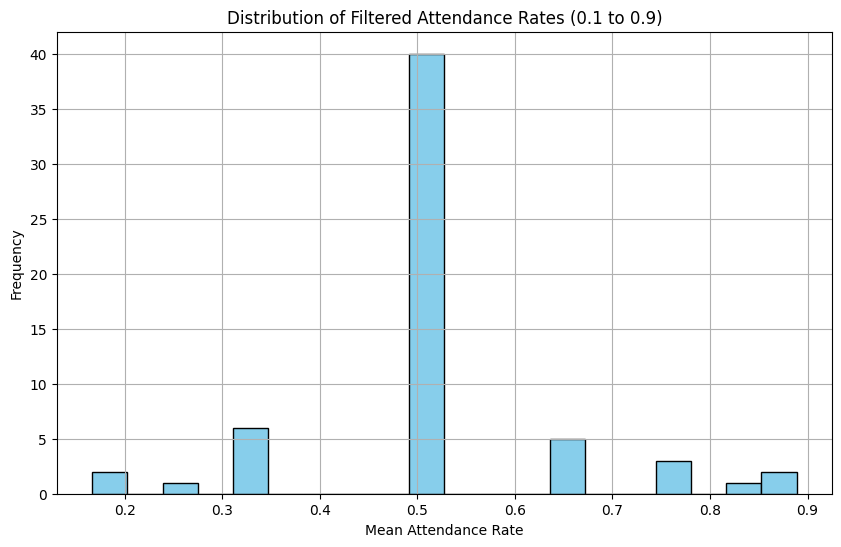

In [24]:
# Calculate the mean attendance rate for each client
mean_attendance_rates = action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()

# Filter attendance rates between 0.1 and 0.9
filtered_attendance_rates = mean_attendance_rates[mean_attendance_rates.between(0.1, 0.9)]

# Visualize the distribution of filtered attendance rates
plt.figure(figsize=(10, 6))
plt.hist(filtered_attendance_rates, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Filtered Attendance Rates (0.1 to 0.9)')
plt.xlabel('Mean Attendance Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

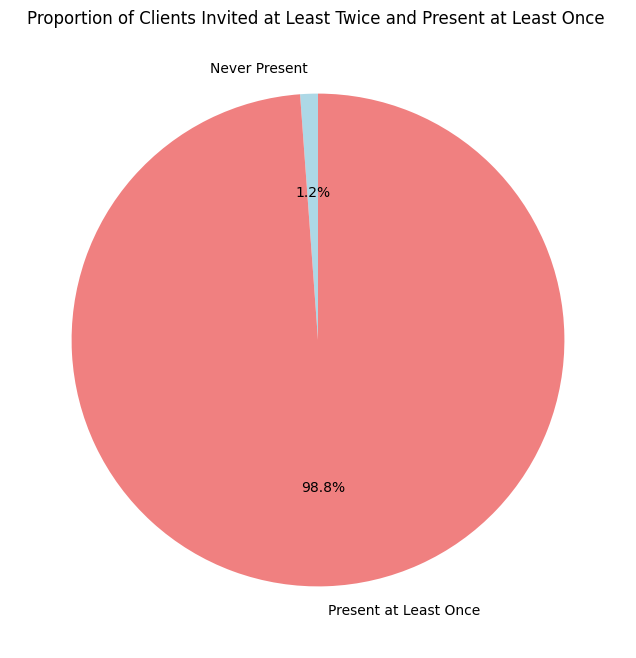

In [25]:
# Calculate the total number of 1s in 'client_is_invited' for each client
action_data.groupby('client_id')['client_is_invited'].sum()

# Create a mask for clients with more than two 1s in 'client_is_invited'
more_than_five_invited = action_data.groupby('client_id')['client_is_invited'].sum() >= 2

# Create a mask for clients with no 1s in 'client_is_present'
no_present = action_data.groupby('client_id')['client_is_present'].sum() == 0

# Combine masks to identify clients meeting both criteria
selected_clients = more_than_five_invited & no_present

# Calculate the proportion of selected clients
proportion_selected = selected_clients.mean()

# Visualize the proportion
labels = ['Never Present', 'Present at Least Once']
sizes = [proportion_selected, 1 - proportion_selected]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Clients Invited at Least Twice and Present at Least Once ')
plt.show()

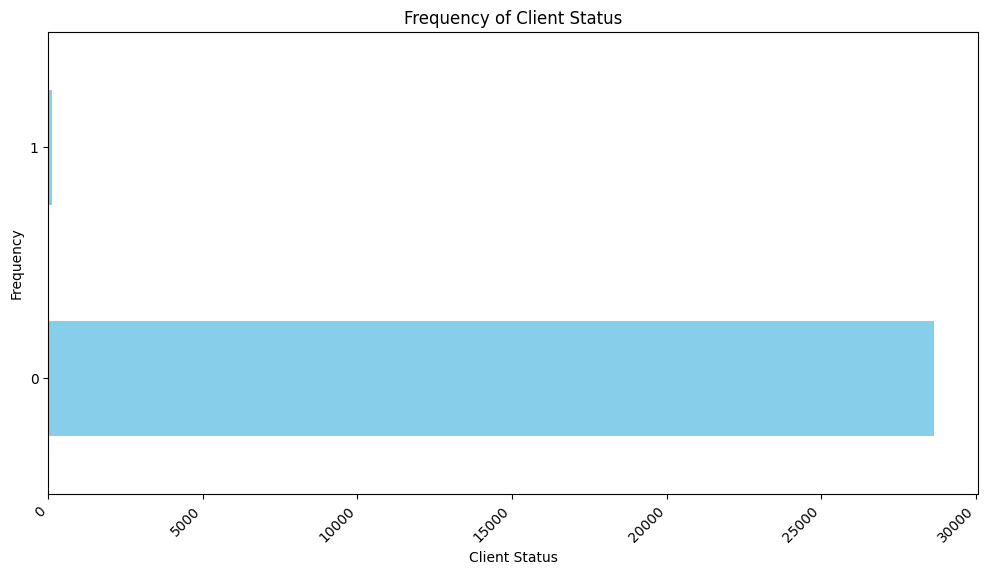

Percentage of premium clients: 0.38607352787729127


In [26]:
# Visualize distribution of client status
premium_counts = client_data['client_premium_status'].value_counts()

plt.figure(figsize=(12, 6))
premium_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Status')
plt.xlabel('Client Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"Percentage of premium clients: {len(client_data[client_data['client_premium_status']==1]['client_id'])/len(client_data['client_id'])*100}")

1.2. Visualizing Premium Client Profile and Behavior

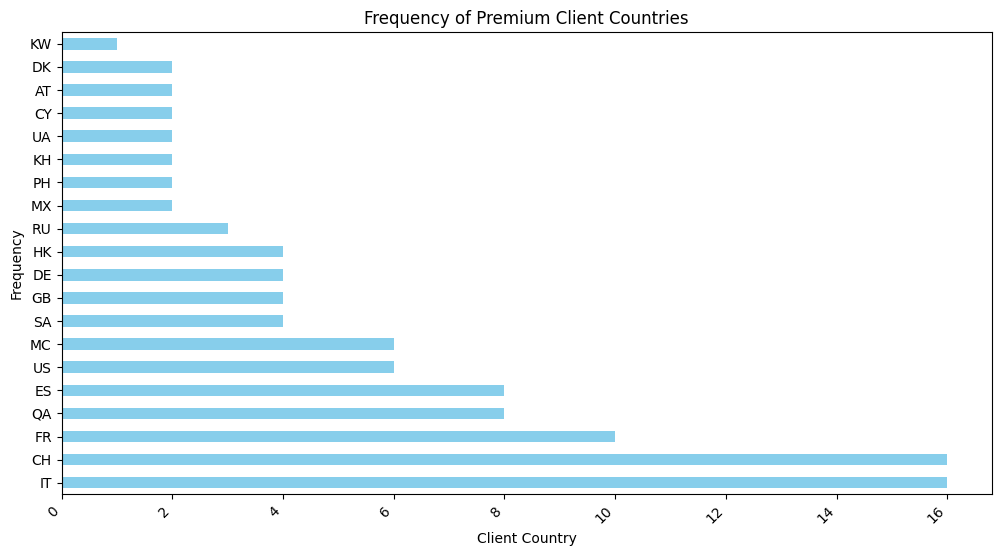

In [27]:
premium_client_data = client_data[client_data['client_premium_status']==1]

# Visualize most frequent premium client countries
premium_country_counts = premium_client_data['client_country'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_country_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Countries')
plt.xlabel('Client Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

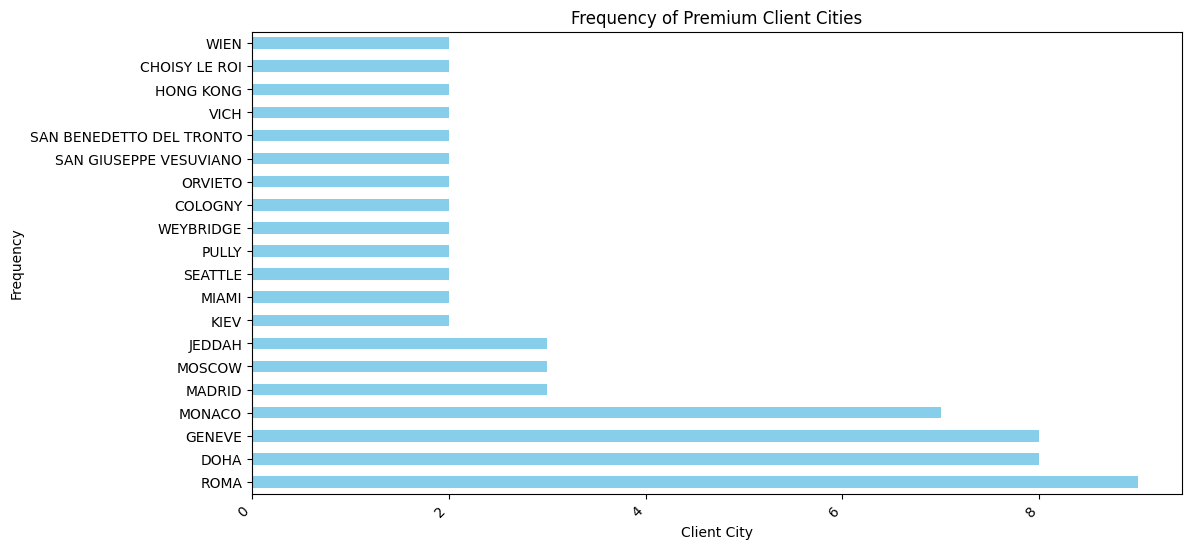

In [28]:
# Visualize most frequent premium client cities
premium_city_counts = premium_client_data['client_city'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_city_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Cities')
plt.xlabel('Client City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

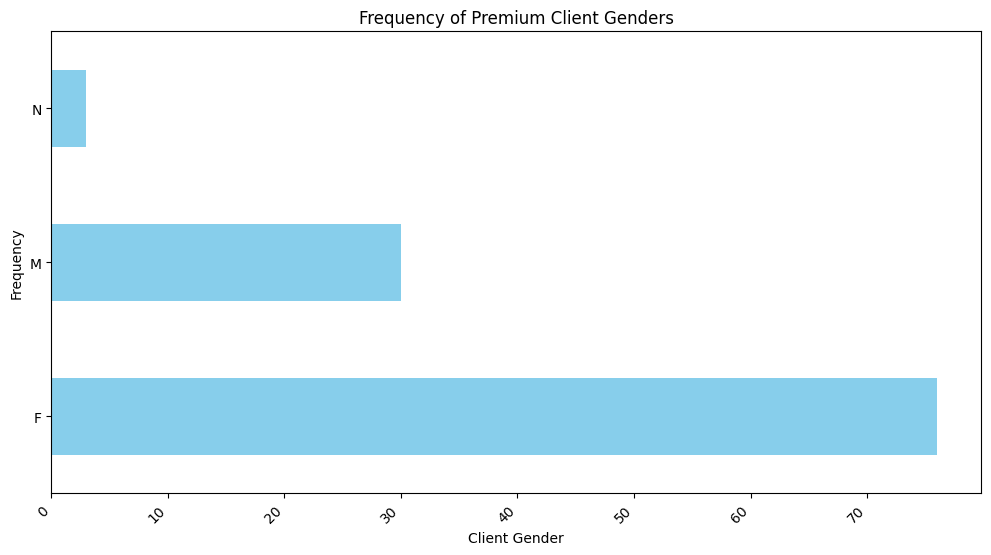

In [29]:
# Visualize most frequent premium client genders
premium_gender_counts = premium_client_data['client_gender'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_gender_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Genders')
plt.xlabel('Client Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

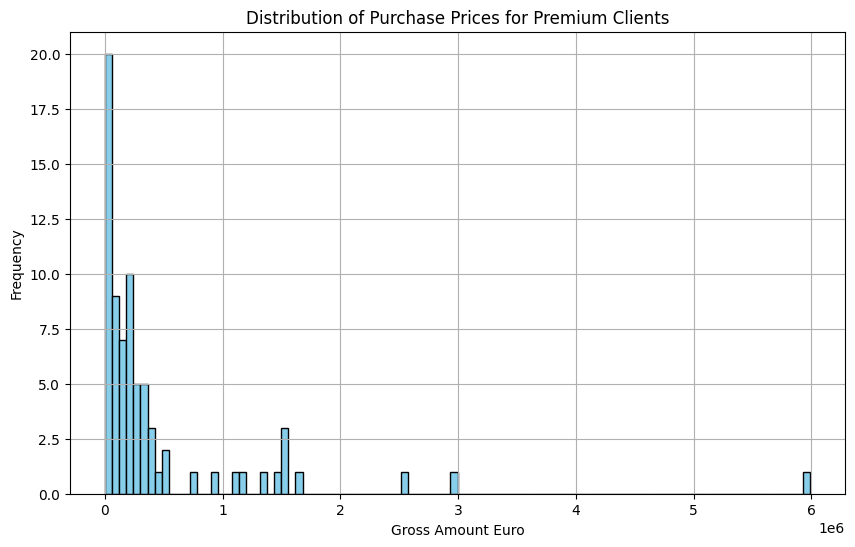

In [30]:
# Visualize Distribution of Premium Clients Purchase Prices
plt.figure(figsize=(10, 6))
plt.hist(merged_data[merged_data["client_premium_status"]==1].groupby("client_id")["gross_amount_euro"].sum(), bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Prices for Premium Clients')
plt.xlabel('Gross Amount Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_598/1221534538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_client_data['client_is_contactable'] = premium_client_data['client_is_contactable'].astype('int')


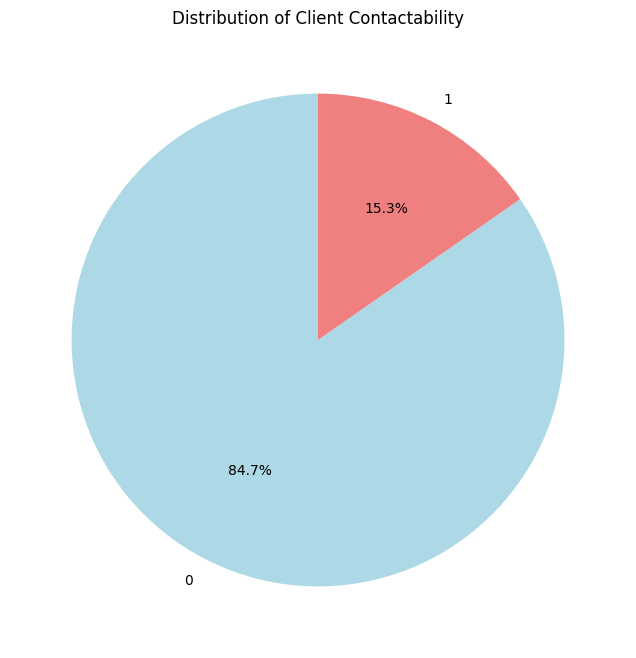

In [31]:
premium_client_data['client_is_contactable'] = premium_client_data['client_is_contactable'].astype('int')

# Visualizing proportion of contactable premium clients
premium_contactable_counts = premium_client_data['client_is_contactable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(premium_contactable_counts, labels=contactable_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Client Contactability')
plt.show()

**2. Time Series Analysis**

In [32]:
merged_data.set_index('transaction_date', inplace=True)

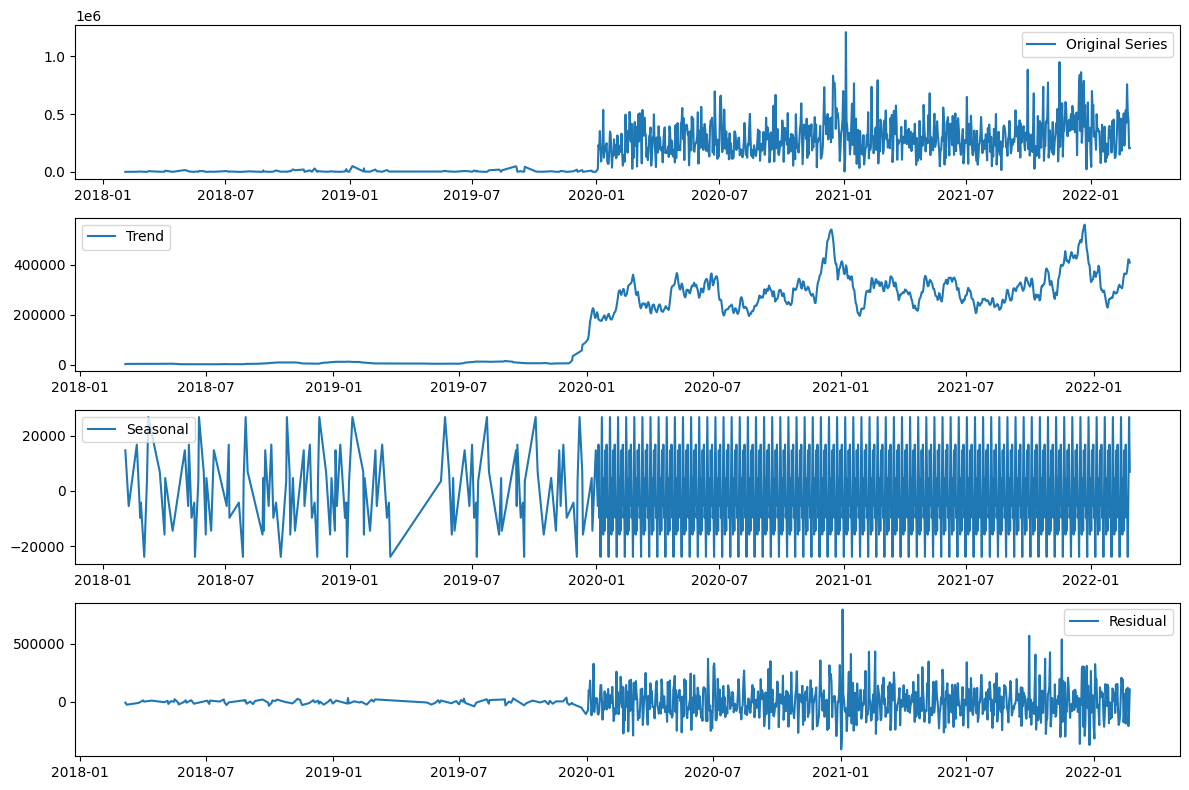

In [33]:
# Perform seasonal decomposition
result = seasonal_decompose(merged_data[merged_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().dropna(), model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(merged_data[merged_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum(), label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

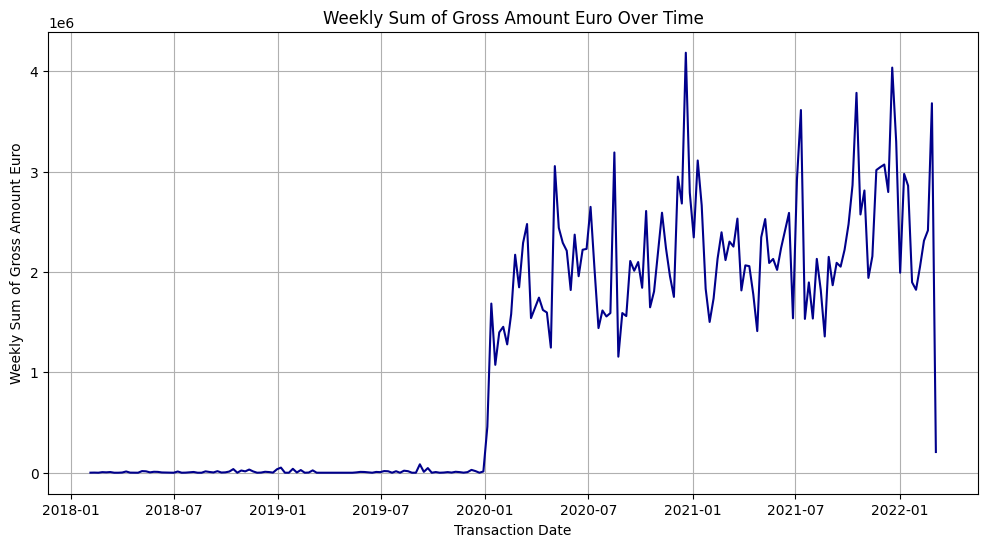

In [34]:
# Resample the data weekly and calculate the sum of 'gross_amount_euro'
weekly_sum = merged_data['gross_amount_euro'].resample('W').sum()

# Plot the weekly sum of 'gross_amount_euro' over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_sum, linestyle='-', color='darkblue')
plt.title('Weekly Sum of Gross Amount Euro Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Weekly Sum of Gross Amount Euro')
plt.grid(True)
plt.show()

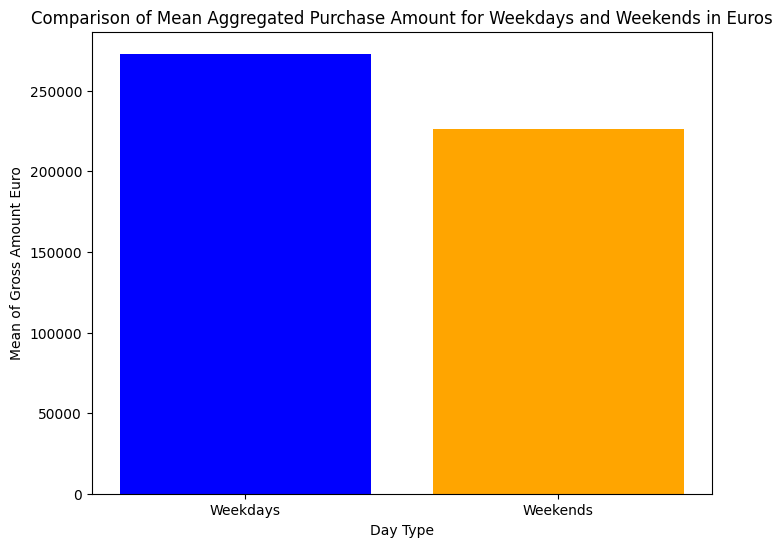

In [35]:
# Extract day of the week (0 = Monday, 6 = Sunday)
merged_data['day_of_week'] = merged_data.index.dayofweek

# Separate data for weekdays and weekends
weekdays_data = merged_data[merged_data['day_of_week'] < 5]
weekends_data = merged_data[merged_data['day_of_week'] >= 5]

# Calculate the sum of 'gross_amount_euro' for weekdays and weekends
mean_weekdays = weekdays_data[weekdays_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().mean()
mean_weekends = weekends_data[weekends_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().mean()

plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [mean_weekdays, mean_weekends], color=['blue', 'orange'])
plt.title('Comparison of Mean Aggregated Purchase Amount for Weekdays and Weekends in Euros')
plt.xlabel('Day Type')
plt.ylabel('Mean of Gross Amount Euro')
plt.show()

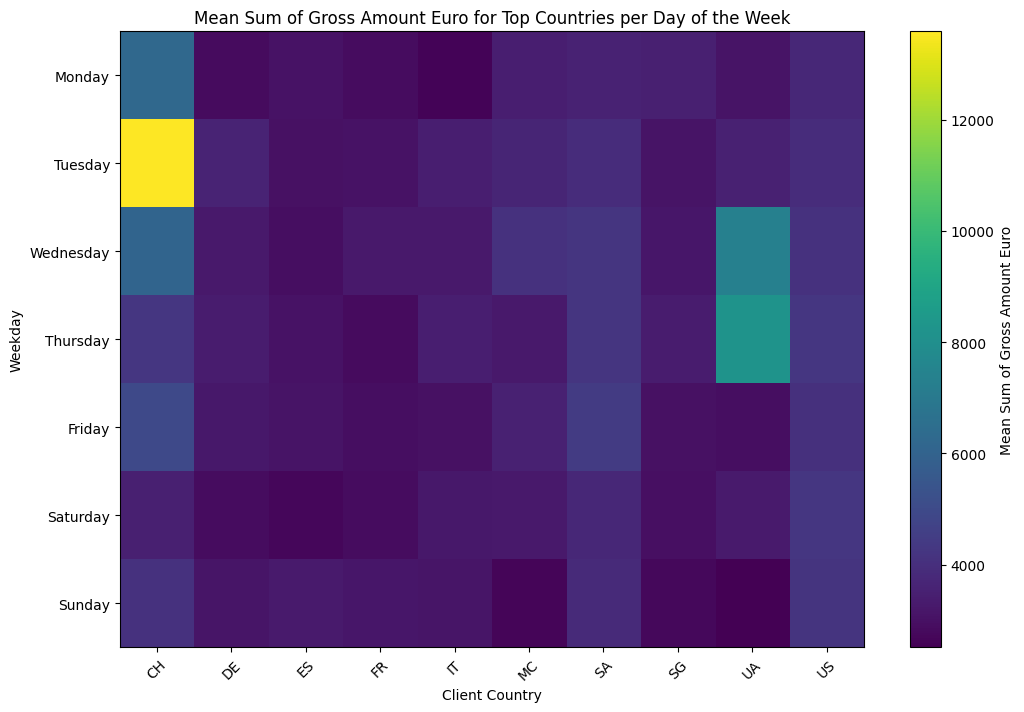

In [36]:
# Extract day of the week (0 = Monday, 6 = Sunday)
merged_data['week_day'] = merged_data.index.dayofweek

# Select the top N countries with the biggest total sum
country_sums = merged_data.groupby('client_country')['gross_amount_euro'].sum()
top_countries = country_sums.nlargest(10).index
filtered_data = merged_data[merged_data['client_country'].isin(top_countries)]

# Group by 'client_country' and 'week_day' and calculate the mean sum of 'gross_amount_euro'
grouped_data = filtered_data.groupby(['client_country', 'week_day'])['gross_amount_euro'].mean()
grouped_data = grouped_data.reset_index()
pivot_data = grouped_data.pivot(index='week_day', columns='client_country', values='gross_amount_euro')

plt.figure(figsize=(12, 8))
plt.imshow(pivot_data, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='Mean Sum of Gross Amount Euro')
plt.title('Mean Sum of Gross Amount Euro for Top Countries per Day of the Week')
plt.xlabel('Client Country')
plt.ylabel('Weekday')
plt.xticks(range(len(pivot_data.columns)), pivot_data.columns, rotation=45)
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

**2.1. Measuring Incremental Effect of Event Invitation on Sales**

In [37]:
merged_data = merged_data.reset_index(drop=False)

In [38]:
# Filter data for 'client_is_invited' == 1 and 'transaction_date' less than 1 month after 'action_start_date'
filtered_data = merged_data[(merged_data['client_is_invited'] == 1) & (merged_data['action_start_date'] < merged_data['transaction_date']) & (merged_data['transaction_date'] < merged_data['action_start_date'] + pd.DateOffset(months=1))]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro'
incremental_sales_per_client = filtered_data.groupby(['client_id','action_id'])['gross_amount_euro'].sum().reset_index()

In [39]:
# Filter data for 'client_is_invited' == 1 and transaction date is between one month before and the action date
filtered_data_before = merged_data[(merged_data['client_is_invited'] == 1) &
                                   (merged_data['transaction_date'] >= merged_data['action_start_date'] - pd.DateOffset(months=1)) &
                                   (merged_data['transaction_date'] < merged_data['action_start_date'])]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro' for one month before the action date
sum_before = filtered_data_before.groupby(['client_id', 'action_id'])['gross_amount_euro'].sum().reset_index()

# Filter data for 'client_is_invited' == 1 and transaction date is between the action date and one month after
filtered_data_after = merged_data[(merged_data['client_is_invited'] == 1) &
                                  (merged_data['transaction_date'] >= merged_data['action_start_date']) &
                                  (merged_data['transaction_date'] < merged_data['action_start_date'] + pd.DateOffset(months=1))]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro' for one month after the action date
sum_after = filtered_data_after.groupby(['client_id', 'action_id'])['gross_amount_euro'].sum().reset_index()

# Merge the sum_before and sum_after dataframes with the original dataframe
merged_data = pd.merge(merged_data, sum_before, on=['client_id', 'action_id'], how='left', suffixes=('', '_before'))
merged_data = pd.merge(merged_data, sum_after, on=['client_id', 'action_id'], how='left', suffixes=('', '_after'))

# Calculate incremental sales within one month after event
merged_data["incremental_sales"] = merged_data["gross_amount_euro_after"] - merged_data["gross_amount_euro_before"]


In [40]:
merged_data[merged_data["action_id"] == "a862710"].style

,transaction_date,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited,transaction_id,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style,client_country,client_gender,client_nationality,client_city,client_segment,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_duration,day_of_week,week_day,gross_amount_euro_before,gross_amount_euro_after
54517,2021-08-15 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t53941790,1,550,Women Accessory,Unknown,Stylish Fashion,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,6,6,19090.000000,5409.000000
54526,2021-08-15 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t53941790,1,7376,Men Bags,Unknown,Canvas Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,6,6,19090.000000,5409.000000
54527,2021-08-15 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t53941790,1,6124,Women Bags,bottom segment,Fashion Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,6,6,19090.000000,5409.000000
56014,2021-09-04 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t96416573,1,1060,Men Accessory,Unknown,Casual Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,5,5,19090.000000,5409.000000
56030,2021-09-04 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t96416573,1,2767,Men Shoes,Unknown,Sneaker Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,5,5,19090.000000,5409.000000
56037,2021-09-04 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t96416573,1,1751,Men Shoes,Unknown,Sneaker Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,5,5,19090.000000,5409.000000
56357,2021-09-09 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t20690537,1,11571,Women Bags,Unknown,Canvas Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,3,3,19090.000000,5409.000000
56411,2021-09-10 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t47924323,1,1301,Men Accessory,Unknown,Casual Style,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,4,4,19090.000000,5409.000000
56615,2021-09-12 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t51544765,1,1590,Men Ready-to-Wear,Unknown,Upper Casual,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,6,6,19090.000000,5409.000000
56629,2021-09-12 00:00:00,a862710,Collection,Collection,2021-10-21 00:00:00,2021,2021-10-21 00:00:00,2021,Winter Collection,Men's Fashion,Retail,In store,Social Gathering,c06811370,1,1,t24412726,1,633,Women Accessory,Unknown,Stylish Fashion,SA,M,SAU,Jdh,2,0,0,0,0,0,0 days 00:00:00,6,6,19090.000000,5409.000000


- converting to datetime format
- filtering the data based on invitation status. Whether client is invited or not
- Creating an attendance rate feature
- 

<Axes: >

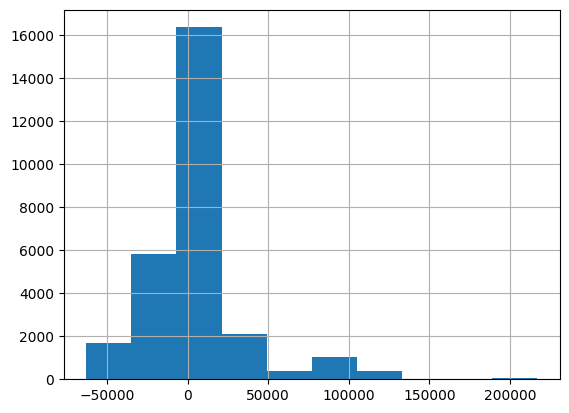

In [42]:
merged_data["incremental_sales"].hist()

In [43]:
# Simulate generation of guest list
merged_data.sort_values(by='incremental_sales',ascending=False).drop_duplicates()['client_id'].unique()[:10]

array(['c47765792', 'c81328703', 'c73006240', 'c40764050', 'c63177766',
       'c14536507', 'c07305936', 'c91697515', 'c46647242', 'c55911932'],
      dtype=object)

In [44]:
# Calculate baseline trend
baseline_trend = merged_data.groupby('action_id')["incremental_sales"].mean().dropna()

In [45]:
baseline_trend

action_id
a000858    -4218.844322
a005065    -4072.758621
a021005    -3530.166667
a025108   -44657.000000
a025518    -8836.544304
               ...     
a968576     6787.241379
a970430   -16957.621429
a971819     2138.884615
a973668    18953.000000
a999183     8819.000000
Name: incremental_sales, Length: 175, dtype: float64

In [46]:
merged_data[["client_id", "action_id"]].value_counts()

client_id  action_id
c81328703  a890054      394
           a366023      394
           a443139      394
           a080092      394
           a347009      394
                       ... 
c46861196  a159231        1
c25932899  a254084        1
c25825416  a445489        1
c25794168  a932079        1
c47527250  a434647        1
Name: count, Length: 5069, dtype: int64

In [47]:
merged_data[(merged_data['client_is_invited'] == 1)].shape

(72301, 38)

In [48]:
merged_data[(merged_data['client_is_invited'] == 0)].shape

(0, 38)

# Modeling

In [49]:
df = merged_data.drop_duplicates().copy()

In [50]:
# df = df[~df.index.duplicated(keep='first')]
from collections import Counter
Counter(df.index.duplicated())

Counter({False: 70852})

In [51]:
df.columns

Index(['transaction_date', 'action_id', 'action_type_label',
       'action_subcategory_label', 'action_start_date', 'action_year',
       'action_end_date', 'action_collection_year', 'action_collection',
       'action_universe', 'action_category_label', 'action_channel',
       'action_label', 'client_id', 'client_is_present', 'client_is_invited',
       'transaction_id', 'product_quantity', 'gross_amount_euro',
       'product_category', 'product_subcategory', 'product_style',
       'client_country', 'client_gender', 'client_nationality', 'client_city',
       'client_segment', 'client_premium_status',
       'client_is_phone_contactable', 'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_duration', 'day_of_week', 'week_day',
       'gross_amount_euro_before', 'gross_amount_euro_after',
       'incremental_sales'],
      dtype='object')

In [52]:
df["incremental_sales"].isna().sum(), df.shape

(43504, (70852, 38))

In [53]:
df = df[df["incremental_sales"].notna()].copy()

In [54]:
df.head().style

,transaction_date,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited,transaction_id,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style,client_country,client_gender,client_nationality,client_city,client_segment,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_duration,day_of_week,week_day,gross_amount_euro_before,gross_amount_euro_after,incremental_sales
2,2018-02-20 00:00:00,a559142,Collection,Collection,2020-10-07 00:00:00,2020,2020-10-08 00:00:00,2020,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c03818049,1,1,t15158583,1,1696,Child,Unknown,Daily Style,MC,F,MCO,ALMATY,7,0,1,0,1,1,1 days 00:00:00,1,1,2650.000000,6567.000000,3917.000000
3,2018-02-25 00:00:00,a357089,Collection,Collection,2020-10-06 00:00:00,2020,2020-10-08 00:00:00,2020,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c53473259,1,1,t72021108,1,1987,Woman Shoes,Unknown,Formal Day Style,IT,F,ITA,BARLETTA,1,0,0,0,1,1,2 days 00:00:00,6,6,12325.000000,3770.000000,-8555.000000
4,2018-02-25 00:00:00,a274463,Social Celebrity Action,Collection,2020-05-05 00:00:00,2020,2020-05-08 00:00:00,2020,Retail Action,Women's Fashion,Retail,In store,Miscellaneous Social Gathering,c53473259,1,1,t72021108,1,1987,Woman Shoes,Unknown,Formal Day Style,IT,F,ITA,BARLETTA,1,0,0,0,1,1,3 days 00:00:00,6,6,9553.000000,7467.000000,-2086.000000
7,2018-03-07 00:00:00,a357089,Collection,Collection,2020-10-06 00:00:00,2020,2020-10-08 00:00:00,2020,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c43763486,1,1,t82197092,1,148,Women Accessory,bottom segment,Fashion Style,RU,F,RUS,MOSCOW,3,0,0,0,0,0,2 days 00:00:00,2,2,2914.000000,1415.000000,-1499.000000
18,2018-05-02 00:00:00,a141947,Collection,Collection,2021-11-11 00:00:00,2021,2021-11-11 00:00:00,2021,Sailor Collection,Women's Fashion,Retail,In store,Social Gathering,c46994176,1,1,t34805661,1,3202,Women Accessory,top segment,Fashion Style,IT,F,ITA,ROMA,6,0,1,1,1,1,0 days 00:00:00,2,2,17776.000000,5932.000000,-11844.000000


In [55]:
as_idx = ["action_id", "client_id"]
to_drop = ["transaction_date", "action_start_date", "action_end_date", "client_is_invited", "transaction_id",
           "gross_amount_euro_before", "gross_amount_euro_after"]
categorical_cols = ["action_type_label", "action_subcategory_label", "action_collection", "action_universe", "action_category_label",
                    "action_channel", "action_label", "product_category", "product_subcategory", "product_style", "client_country", 
                    "client_city", ]

df = df.set_index(as_idx, drop=True)
df = df.drop(to_drop, axis=1)
df["action_duration"] = df["action_duration"].dt.total_seconds() / (60*60*24)

In [56]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['action_type_label', 'action_subcategory_label', 'action_collection',
       'action_universe', 'action_category_label', 'action_channel',
       'action_label', 'product_category', 'product_subcategory',
       'product_style', 'client_country', 'client_gender',
       'client_nationality', 'client_city'],
      dtype='object')

In [57]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GroupShuffleSplit
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error


# Set the maximum number of categories for OneHotEncoder
max_categories = 15

# Set the threshold frequency for merging less frequent categories
threshold_frequency = 2

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', Pipeline([
                ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=max_categories)),
            ]), categorical_cols)
        ],
        remainder='passthrough'
    )),
    ('classifier', XGBRegressor())
])

# Split the data into features and target
X = df.drop('incremental_sales', axis=1)
y = df['incremental_sales']

# Use GroupShuffleSplit for a group-wise split
groups = df.index.get_level_values(0)
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in group_splitter.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")


RMSE: 34119.80


In [75]:
X_test.shape

(5864, 28)

In [58]:
y_pred = pd.Series(y_pred, index=y_test.index)
y_pred, y_test

(action_id  client_id
 a559142    c03818049    16360.885742
 a357089    c53473259    -1490.450073
 a274463    c53473259     1404.814331
 a357089    c43763486     1499.398315
 a141947    c46994176      989.725891
                             ...     
            c19993069     7258.728027
            c19993069     6952.963867
 a093245    c39128692    12179.876953
 a559142    c25819964   -24147.744141
 a082822    c25047089   -11361.340820
 Length: 5864, dtype: float32,
 action_id  client_id
 a559142    c03818049     3917.0
 a357089    c53473259    -8555.0
 a274463    c53473259    -2086.0
 a357089    c43763486    -1499.0
 a141947    c46994176   -11844.0
                          ...   
            c19993069    19787.0
            c19993069    19787.0
 a093245    c39128692    33775.0
 a559142    c25819964   -55034.0
 a082822    c25047089    26318.0
 Name: incremental_sales, Length: 5864, dtype: float64)

In [59]:
y_train_pred = pipeline.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=X_train.index)

In [60]:
root_mean_squared_error(y_train, y_train_pred)

2657.774054009562

In [61]:
np.unique(y_pred.index.get_level_values(0))

array(['a065705', 'a072800', 'a081261', 'a082822', 'a091304', 'a093245',
       'a115656', 'a136581', 'a141054', 'a141947', 'a191861', 'a195174',
       'a210104', 'a254084', 'a270916', 'a274463', 'a316574', 'a357089',
       'a359413', 'a441938', 'a559142', 'a597428', 'a613967', 'a620470',
       'a626448', 'a648427', 'a651604', 'a653983', 'a704802', 'a706493',
       'a754406', 'a794031', 'a862710', 'a865323', 'a932079'],
      dtype=object)

In [62]:
y_pred = y_pred.sort_values(ascending=False)
y_pred[~y_pred.index.duplicated(keep='first')]

action_id  client_id
a141947    c44378985    44328.207031
a274463    c46647242    38351.320312
a191861    c19685511    24775.470703
           c11626154    23354.482422
           c19031676    23187.625000
                            ...     
a136581    c62832536   -13685.543945
a093245    c16901050   -17099.437500
a559142    c25819964   -23779.025391
a648427    c56559241   -24814.662109
a704802    c09358802   -25162.939453
Length: 160, dtype: float32

In [63]:
y_pred["a191861"]
y_pred["a191861"][~y_pred["a191861"].index.duplicated(keep='first')]

client_id
c19685511    24775.470703
c11626154    23354.482422
c19031676    23187.625000
c82574852    22173.755859
c86314229    22118.681641
c66185261    21192.111328
c64848896    18761.119141
c46928316    17857.496094
c72038421    17769.648438
c79966938    17657.699219
c55911932    12109.826172
c33806538    -4784.110840
dtype: float32

<Axes: >

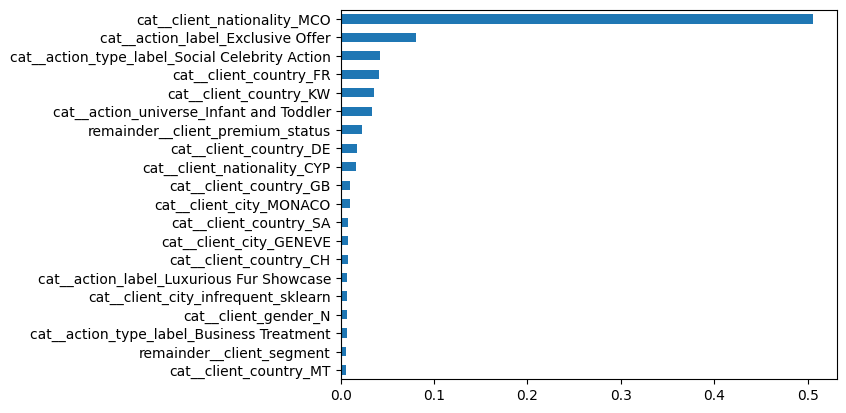

In [64]:
pd.Series(pipeline["classifier"].feature_importances_, index=pipeline[:-1].get_feature_names_out()).sort_values()[-20:].plot(kind="barh")

In [65]:
df = df.reset_index()

In [67]:
predictions = pd.concat([y_train_pred, y_pred])
predictions.rename("uplift_pred")

action_id  client_id
a267273    c46994176     -760.498413
a627142    c14466669     5718.496094
a267273    c16516403    -1927.070801
a434647    c16516403    -5209.846191
a626356    c27573584     8870.300781
                            ...     
a704802    c09358802   -26806.597656
           c09358802   -26837.808594
a274463    c14937742   -31180.591797
           c14937742   -31180.591797
           c14937742   -33914.269531
Name: uplift_pred, Length: 27348, dtype: float32

In [68]:
df = df.join(predictions.rename("uplift_pred"), on=["action_id", "client_id"])

In [70]:
df.rename({"incremental_sales": "uplift"}, axis=1).to_csv("df_with_preds.csv")

In [74]:
df["client_is_present"].value_counts()

client_is_present
1    2466217
0      78191
Name: count, dtype: int64

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred > 0, y_test > 0)

0.5088676671214188